### 时间序列分析

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

时间类型及其在python中对应的类型
- 时间戳：timestamp
- 时间间隔：timedelta
- 时期：period

In [84]:
p=pd.Period(2019,freq='A-DEC')
p

Period('2019', 'A-DEC')

In [85]:
p-5

Period('2014', 'A-DEC')

period_range函数创建时期范围


In [95]:
date=pd.period_range('2018-01-01','2019-01-10',freq='Q')

In [96]:
df=pd.Series(np.random.randn(len(date)),index=date)
df

2018Q1    0.494494
2018Q2   -0.001953
2018Q3   -1.231664
2018Q4    0.875689
2019Q1   -0.010776
Freq: Q-DEC, dtype: float64

In [94]:
#PeriodIndex类的构造函数允许直接使用一组字符串表示一段时期
values = ['2018Q1','2018Q2','2018Q3']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2018Q1', '2018Q2', '2018Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

# datetime处理日期

python常用的处理时间的库有：datetime,time,calendar。datetime库包括了date（储存日期：(年、月、日),time(储存时间：(小时、分、秒和微秒)，datetime同时包含了data和time，timedelta代表两个datetime之间的差（天、秒、微秒）。

In [4]:
from datetime import datetime
now=datetime.now()
print(f'当前时间：{now}')
print(f'{now.year}年{now.month}月{now.day}日')

当前时间：2019-01-10 21:24:23.101667
2019年1月10日


In [3]:
now.strftime('%Y-%m-%d')

'2019-01-10'

timedelta计算相差天数和秒数

In [14]:
delta=datetime(2019,1,10)-datetime(2019,1,1,12,30)
delta

datetime.timedelta(days=8, seconds=41400)

In [13]:
from datetime import timedelta
start=datetime(2018,1,1)
#计算50天后是哪一天
start+timedelta(50)

datetime.datetime(2018, 2, 20, 0, 0)

In [11]:
#字符串和时间的转化
#比如想要知道列表里两个时间字符串之间相差多少天
datestr=['12/20/2018','12/11/2018']
new_date=[datetime.strptime(d,'%m/%d/%Y') for d in datestr]
new_date[0]-new_date[1]

datetime.timedelta(days=9)

In [13]:
#将datetime格式转换为常见的年（Y）月（m）日（d）格式表示
[date.strftime('%Y-%m-%d') for date in new_date]

['2018-12-20', '2018-12-11']

datetime.strptime只能根据设定的时间格式来处理指定的字符串，如果列表里(list)包含不止一种格式的字符串，如datestr=\['12/20/2018','12/11/2018','2018-10-18'\],使用datetime.strptime就很难处理了。遇到这种情况可以引入第三方时间处理包dateutil，可以处理任意格式字符串。

In [24]:
from dateutil.parser import parse
datestr=['12/20/2018','20180210','2019-01-10']
#转换成datetime格式
new_d=[parse(d) for d in datestr]
#统一为12/20/2018格式
d1=[d.strftime('%m/%d/%Y') for d in new_d]
d2=[d.strftime('%Y%m%d') for d in new_d]
d3=[d.strftime('%Y-%m-%d') for d in new_d]
d4=[d.strftime('%y-%m-%d') for d in new_d]
print(f'datetime格式：\n{new_d}')
print(f'"月/日/年"格式：\n {d1}')
print(f'"年月日"格式：\n{d2}')
print(f'"年-月-日格式"：\n{d3}')
print(f'"年（后两位）-月-日"格式：\n{d4}')

datetime格式：
[datetime.datetime(2018, 12, 20, 0, 0), datetime.datetime(2018, 2, 10, 0, 0), datetime.datetime(2019, 1, 10, 0, 0)]
"月/日/年"格式：
 ['12/20/2018', '02/10/2018', '01/10/2019']
"年月日"格式：
['20181220', '20180210', '20190110']
"年-月-日格式"：
['2018-12-20', '2018-02-10', '2019-01-10']
"年（后两位）-月-日"格式：
['18-12-20', '18-02-10', '19-01-10']


# 使用NumPy库处理日期
numpy库的时间格式是datetime64

In [26]:
#将字符串转换成numpy格式时间
#注意个位前补0，如1月写成01
nd=np.datetime64('2019-01-10')
nd

numpy.datetime64('2019-01-10')

In [30]:
#转化为字符串
np.datetime_as_string(nd)

'2019-01-10'

In [29]:
np.datetime64('1901')

numpy.datetime64('1901')

In [31]:
#转化为datetime格式
nd.astype(datetime)

datetime.date(2019, 1, 10)

In [32]:
#生成时间序列
#默认以日为间隔，算头不算尾
np.arange('2019-01-05','2019-01-10',dtype='datetime64')

array(['2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
       '2019-01-09'], dtype='datetime64[D]')

In [37]:
#以月为间隔，生成2018年12个月
np.arange('2018-01-01','2019-01-01',dtype='datetime64[M]')

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='datetime64[M]')

In [39]:
#以年为间隔
np.arange('2015-01-01','2019-01-20',dtype='datetime64[Y]')

array(['2015', '2016', '2017', '2018'], dtype='datetime64[Y]')

In [40]:
#以周为间隔
np.arange('2018-12-01','2018-12-20',dtype='datetime64[W]')

array(['2018-11-29', '2018-12-06', '2018-12-13'], dtype='datetime64[W]')

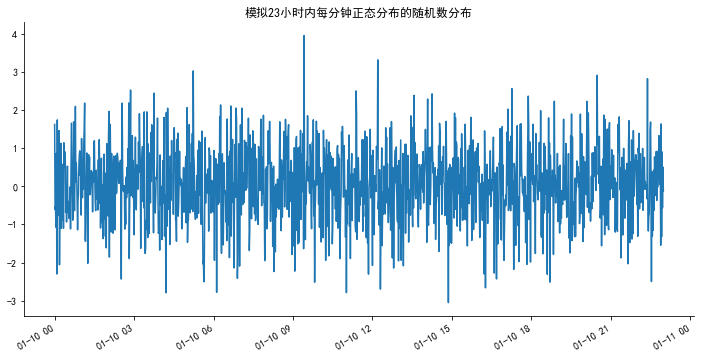

In [10]:
#设定随机种子（括号里的数字只是起标记作用）
np.random.seed(1)
#h:小时，m:分，s：秒，ms微秒
#生成分时
x=np.arange('2019-01-10T00:00:00','2019-01-10T23:00:00',dtype='datetime64[m]')
#生成标准正态分布时间序列
y=np.random.standard_normal(len(x))
#设置图片大小
fig=plt.figure(figsize=(12,6))
#将x的np.datetime转换为datetime.datetime
plt.plot(x.astype(datetime),y)
fig.autofmt_xdate()
plt.title('模拟23小时内每分钟正态分布的随机数分布')
# 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')  
plt.show()

# Pandas库处理日期
Pandas包可以说是为处理时间序列而生的。日期时间在pandas储存的格式为Timestamp。

In [18]:
t=pd.Timestamp('2019-01-10')
t

Timestamp('2019-01-10 00:00:00')

In [19]:
#将Timestamp转换为numpy.datetime64
d = t.to_datetime64()
d

numpy.datetime64('2019-01-10T00:00:00.000000000')

In [20]:
#转化为Timestamp
dstr=['20181201','20181202','20181203']
#DatetimeIndex
pd.to_datetime(dstr)

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03'], dtype='datetime64[ns]', freq=None)

In [78]:
#使用date_range生成日期序列
dt = pd.date_range('2018/01/01', freq='M', periods=12)
dt

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [79]:
dt[2]

Timestamp('2018-03-31 00:00:00', freq='M')

In [82]:
#转为化datetime对象
dty=dt.to_pydatetime()
dty

array([datetime.datetime(2018, 1, 31, 0, 0),
       datetime.datetime(2018, 2, 28, 0, 0),
       datetime.datetime(2018, 3, 31, 0, 0),
       datetime.datetime(2018, 4, 30, 0, 0),
       datetime.datetime(2018, 5, 31, 0, 0),
       datetime.datetime(2018, 6, 30, 0, 0),
       datetime.datetime(2018, 7, 31, 0, 0),
       datetime.datetime(2018, 8, 31, 0, 0),
       datetime.datetime(2018, 9, 30, 0, 0),
       datetime.datetime(2018, 10, 31, 0, 0),
       datetime.datetime(2018, 11, 30, 0, 0),
       datetime.datetime(2018, 12, 31, 0, 0)], dtype=object)

In [83]:
#转化回pdans的视角类型
pd.DatetimeIndex(dty)

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq=None)

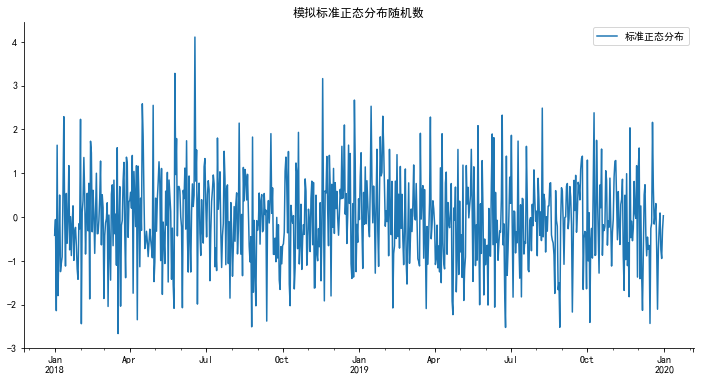

In [24]:
#画以时间为x轴的图,pandas的DataFrame自动将index列作为x轴
np.random.seed(2)
#生成日期序列
x=pd.date_range('2018/01/01','2019/12/31', freq='d')
#标准正态分布时间序列
y=np.random.standard_normal(len(x))
#将二者转换为pandas的数据格式
df=pd.DataFrame(y,columns=['标准正态分布'],index=x)
df.plot(figsize=(12,6))
plt.title('模拟标准正态分布随机数')

ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')  
plt.show()

## 时间序列的样本重采样
时间序列样本转换主要分两种：即高频数据向低频数据转换；低频数据向高频数据转换。  
主要函数:df.resample()，df代表pandas的DataFrame格式数据，resample方法的参数参数中，freq表示重采样频率,例如‘M’、‘5min’,Second(15)，用于产生聚合值的函数名或数组函数,例如‘mean’、‘ohlc’、np.max等,默认是‘mean’,其他常用的有:‘first’、‘last’、‘median’、‘max’、‘min’axis=0默认是纵轴,横轴设置axis=1

### 高频数据向低频数据转化

In [71]:
#导入2019年1月10日上证指数的分时数据
#数据来源：同花顺
df=pd.read_excel('Table.xlsx')
df.head(10)

,时间,成交,现手
0,09:25:00,2543.85,169975700
1,09:30:00,2544.64,118762900
2,09:30:00,2544.34,67005000
3,09:30:00,2543.88,25638400
4,09:30:00,2542.83,27602100
5,09:30:00,2541.97,16822900
6,09:30:00,2542.48,18605000
7,09:30:00,2541.34,19279300
8,09:30:00,2541.32,13209000
9,09:30:00,2542.49,18115500


In [72]:
df=df.set_index(df['时间'])
df.head()

,时间,成交,现手
时间,,,
09:25:00,09:25:00,2543.85,169975700
09:30:00,09:30:00,2544.64,118762900
09:30:00,09:30:00,2544.34,67005000
09:30:00,09:30:00,2543.88,25638400
09:30:00,09:30:00,2542.83,27602100


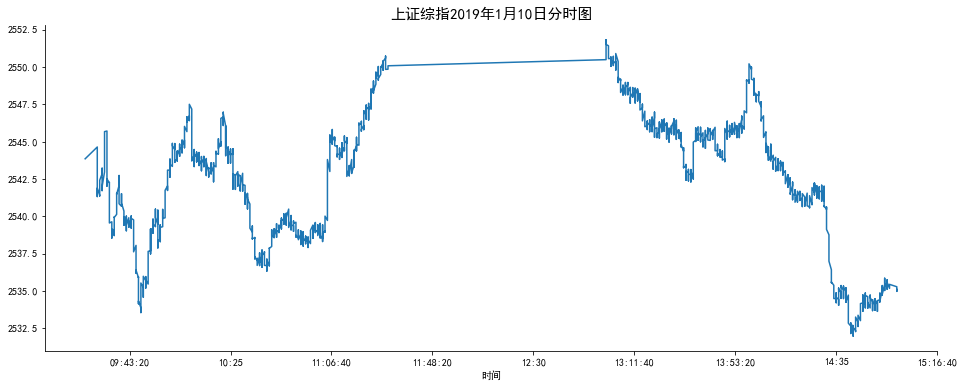

In [73]:
df['成交'].plot(figsize=(16,6),label='成交价格')
plt.title('上证综指2019年1月10日分时图',fontsize=15)
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')  
plt.show()

In [75]:
df.index=pd.to_datetime(df.index,format='%H:%M:%S')
df.head()

,时间,成交,现手
时间,,,
1900-01-01 09:25:00,09:25:00,2543.85,169975700
1900-01-01 09:30:00,09:30:00,2544.64,118762900
1900-01-01 09:30:00,09:30:00,2544.34,67005000
1900-01-01 09:30:00,09:30:00,2543.88,25638400
1900-01-01 09:30:00,09:30:00,2542.83,27602100


In [76]:
ts=df['成交']
ts.head()

时间
1900-01-01 09:25:00    2543.85
1900-01-01 09:30:00    2544.64
1900-01-01 09:30:00    2544.34
1900-01-01 09:30:00    2543.88
1900-01-01 09:30:00    2542.83
Name: 成交, dtype: float64

In [83]:
#将其转换为每5分钟样本,默认closed='left',label='left'
ts.resample('H').mean()

时间
1900-01-01 09:00:00    2539.635000
1900-01-01 10:00:00    2541.493264
1900-01-01 11:00:00    2544.911878
1900-01-01 12:00:00            NaN
1900-01-01 13:00:00    2546.391266
1900-01-01 14:00:00    2539.339170
1900-01-01 15:00:00    2535.080000
Freq: H, Name: 成交, dtype: float64

In [100]:
ts.resample('5min',closed='right').sum()

2017-12-31 23:55:00     0
2018-01-01 00:00:00    15
2018-01-01 00:05:00    40
2018-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [101]:
ts.resample('5min',closed='right',label='right').sum()

2018-01-01 00:00:00     0
2018-01-01 00:05:00    15
2018-01-01 00:10:00    40
2018-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [102]:
ts.resample('5min',closed='left',label='right').sum()

2018-01-01 00:05:00    10
2018-01-01 00:10:00    35
2018-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [105]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

2017-12-31 23:59:59     0
2018-01-01 00:04:59    15
2018-01-01 00:09:59    40
2018-01-01 00:14:59    11
Freq: 5T, dtype: int32

- 根据groupby进行resampling

In [108]:
rng = pd.date_range('1/1/2018', periods=100, freq='D')
ts=pd.Series(np.arange(100),index=rng)
#按月进行汇总求平均值
ts.groupby(lambda x:x.month).mean()

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64

In [110]:
#按周进行汇总求平均值
ts.groupby(lambda x:x.weekday).mean()

0    49.0
1    50.0
2    47.5
3    48.5
4    49.5
5    50.5
6    51.5
dtype: float64

#### 低频数据向高频数据转换

In [112]:
df=pd.DataFrame(np.random.randn(2,4),
            index=pd.date_range('1/1/2018',periods=2,freq='W-WED'),
            columns=['GZ','BJ','SH','SZ'])

In [128]:
df

,GZ,BJ,SH,SZ
2018-01-03,0.041539,-1.117925,0.539058,-0.596160
2018-01-10,-0.019130,1.175001,-0.747871,0.009025


In [122]:
#将上述样本转换为日序列,缺失值使用前值补上
df_daily=df.resample('D').ffill()
df_daily

,GZ,BJ,SH,SZ
2018-01-03,0.041539,-1.117925,0.539058,-0.596160
2018-01-04,0.041539,-1.117925,0.539058,-0.596160
2018-01-05,0.041539,-1.117925,0.539058,-0.596160
2018-01-06,0.041539,-1.117925,0.539058,-0.596160
2018-01-07,0.041539,-1.117925,0.539058,-0.596160
2018-01-08,0.041539,-1.117925,0.539058,-0.596160
2018-01-09,0.041539,-1.117925,0.539058,-0.596160
2018-01-10,-0.019130,1.175001,-0.747871,0.009025


In [123]:
#将上述样本转换为日序列,缺失值使用后值补上
df_daily=df.resample('D').bfill()
df_daily

,GZ,BJ,SH,SZ
2018-01-03,0.041539,-1.117925,0.539058,-0.596160
2018-01-04,-0.019130,1.175001,-0.747871,0.009025
2018-01-05,-0.019130,1.175001,-0.747871,0.009025
2018-01-06,-0.019130,1.175001,-0.747871,0.009025
2018-01-07,-0.019130,1.175001,-0.747871,0.009025
2018-01-08,-0.019130,1.175001,-0.747871,0.009025
2018-01-09,-0.019130,1.175001,-0.747871,0.009025
2018-01-10,-0.019130,1.175001,-0.747871,0.009025


In [127]:
df_daily=df.resample('D').mean()
df_daily

,GZ,BJ,SH,SZ
2018-01-03,0.041539,-1.117925,0.539058,-0.596160
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,-0.019130,1.175001,-0.747871,0.009025


In [131]:
#根据period来重采样
df=pd.DataFrame(np.random.randn(24,4),
            index=pd.period_range('1-2017','12-2018',freq='M'),
            columns=['GZ','BJ','SH','SZ'])

In [133]:
df[:3]

,GZ,BJ,SH,SZ
2017-01,-0.878108,-0.156434,0.256570,-0.988779
2017-02,-0.338822,-0.236184,-0.637655,-1.187612
2017-03,-1.421217,-0.153495,-0.269057,2.231367


In [134]:
#A-DEC: annually, year ending in December
df_annual=df.resample('A-DEC').mean()
df_annual

,GZ,BJ,SH,SZ
2017,-0.643001,-0.033892,-0.050309,0.138446
2018,-0.312618,0.215501,0.087790,0.159978


In [138]:
#Q-DEC: Quarterly, decenber
df_annual.resample('Q-DEC').ffill()

,GZ,BJ,SH,SZ
2017Q1,-0.643001,-0.033892,-0.050309,0.138446
2017Q2,-0.643001,-0.033892,-0.050309,0.138446
2017Q3,-0.643001,-0.033892,-0.050309,0.138446
2017Q4,-0.643001,-0.033892,-0.050309,0.138446
2018Q1,-0.312618,0.215501,0.087790,0.159978
2018Q2,-0.312618,0.215501,0.087790,0.159978
2018Q3,-0.312618,0.215501,0.087790,0.159978
2018Q4,-0.312618,0.215501,0.087790,0.159978
